In [2]:
#!pip install pmdarima
#!pip install arch
#!pip install seaborn

In [5]:
import os

import pandas as pd
import numpy as np
import pandas_datareader.data as pdr

from sklearn.model_selection import train_test_split

from math import sqrt
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

import seaborn as sns
plt.style.use ('seaborn-whitegrid')
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

from arch import arch_model
import pandas_datareader.data as web
from datetime import datetime, timedelta

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [7]:
df = pd.read_csv('AirPassengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
train_data , test_data = train_test_split(df, test_size=0.3, shuffle = False)

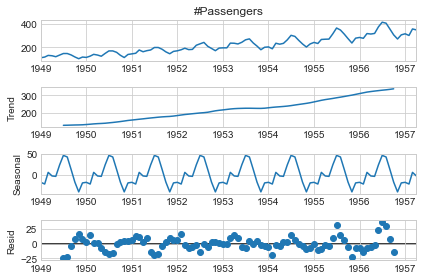

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(train_data['#Passengers']).plot();

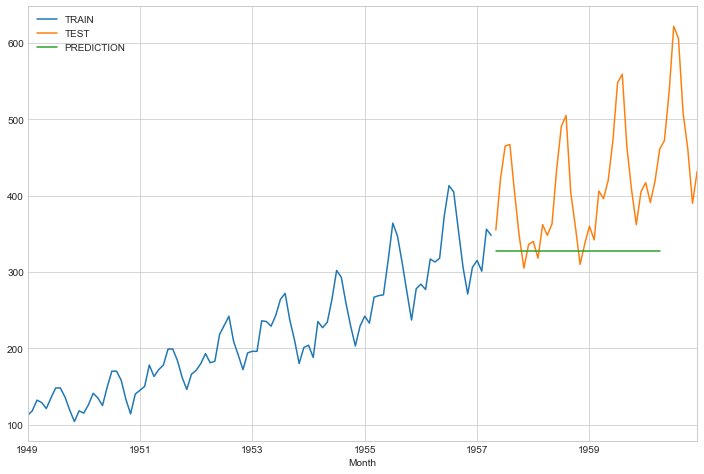

In [10]:
### Simple Exponential Smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12 # The model will consider the last 12 months weighted average for forecasting
alpha = 2/(span+1)
model = SimpleExpSmoothing(train_data['#Passengers']).fit(smoothing_level=alpha)
test_predictions = model.forecast(36).rename('SES Forecast')

train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

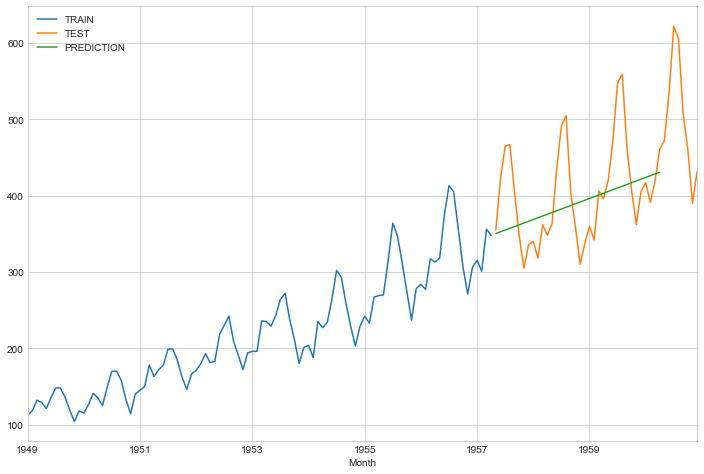

In [11]:
###Double Exponential Smoothing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
double_model = ExponentialSmoothing(train_data['#Passengers'],trend='add').fit()
test_predictions = double_model.forecast(36).rename('DES Forecast')

train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

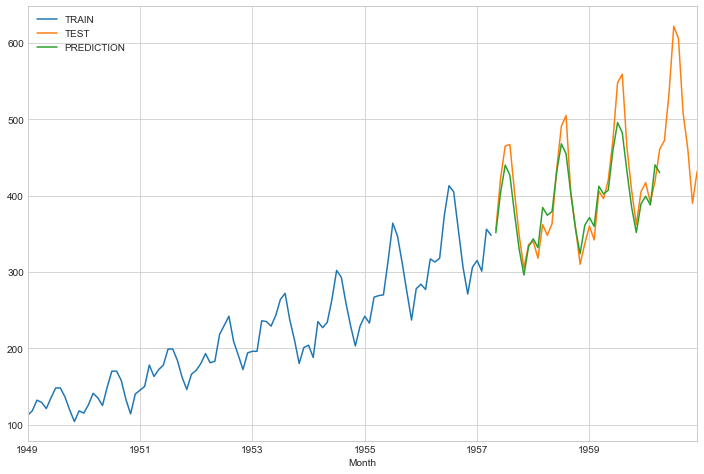

In [12]:
### Triple Exponential Smoothing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
triple_model = ExponentialSmoothing(train_data['#Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = triple_model.forecast(36).rename('TES Forecast')

train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');